In [14]:
import pandas as pd
import numpy as np
from sklearn import model_selection, preprocessing, metrics, linear_model, ensemble, tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


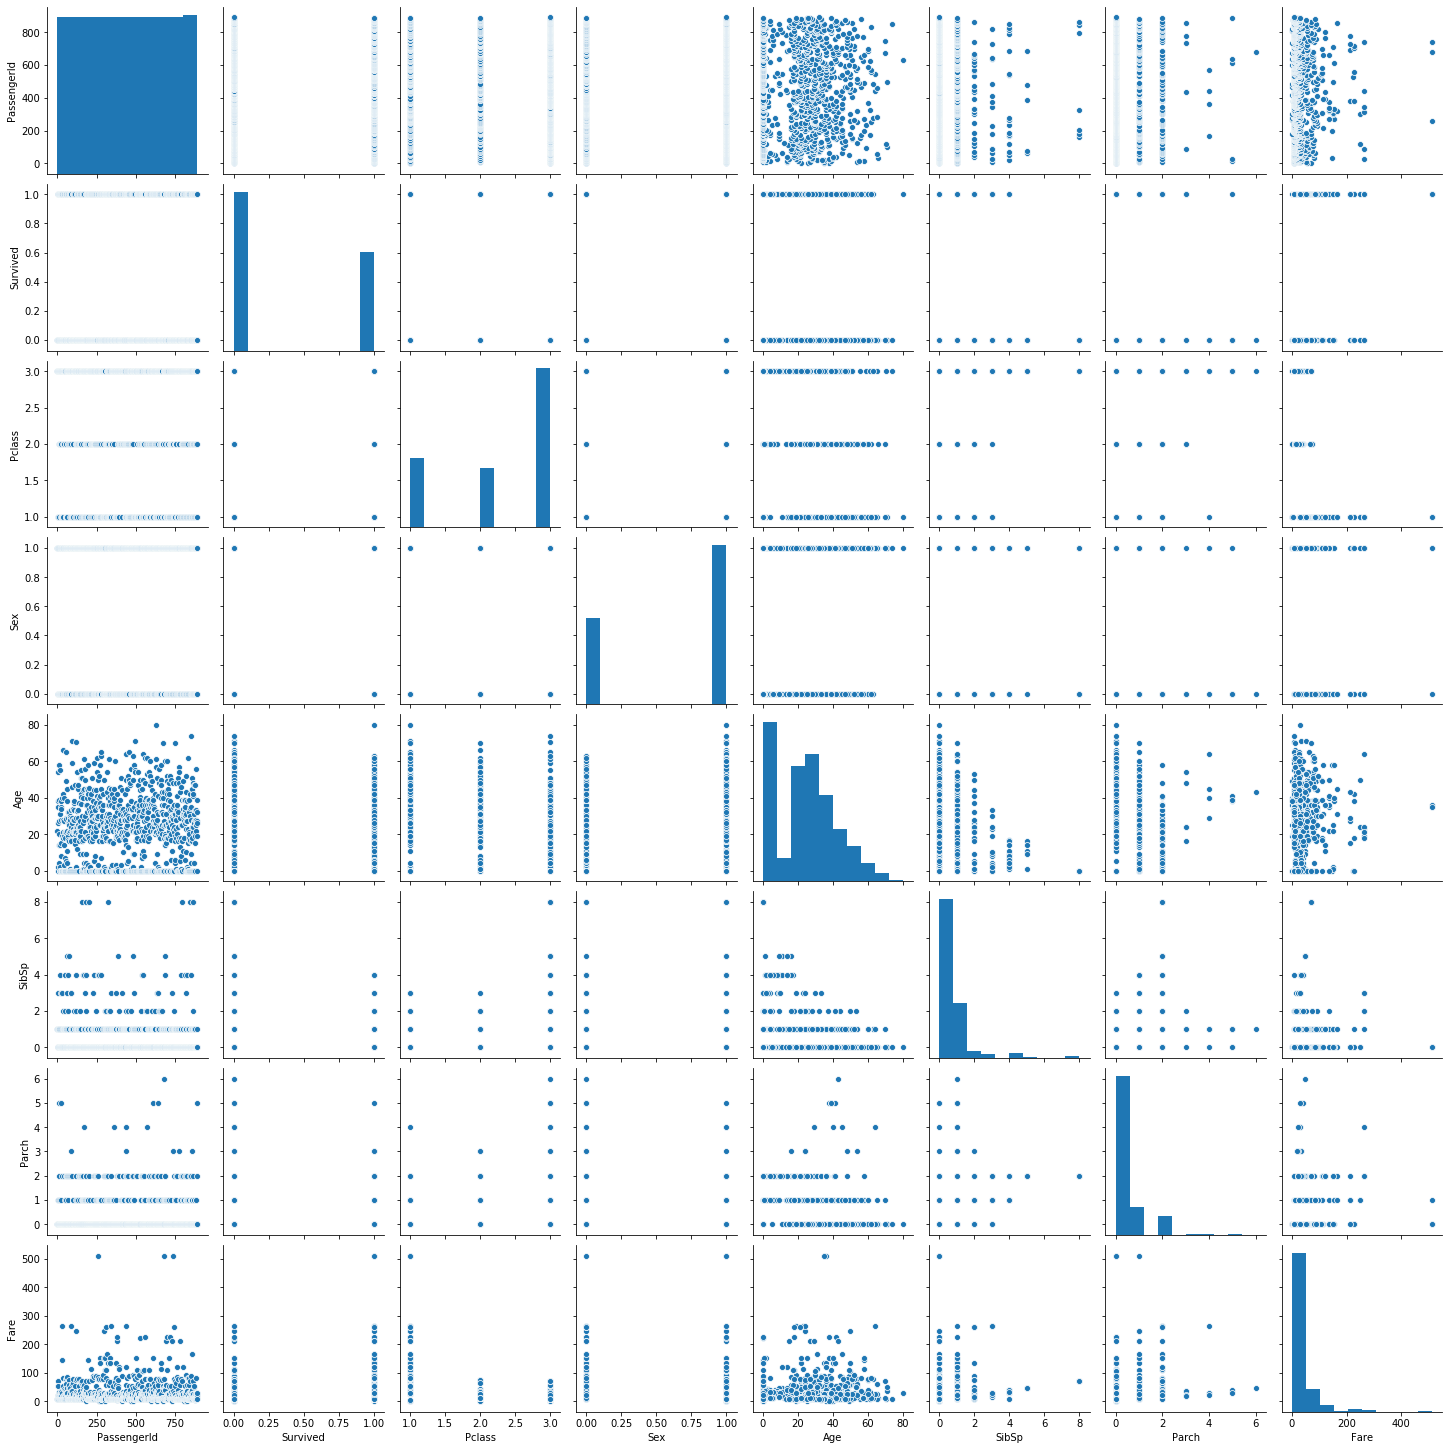

In [15]:
sns.pairplot(data=df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.Age.fillna(0, inplace=True)
df.Cabin.fillna('empty', inplace=True); df.Embarked.fillna('empty', inplace=True)
df.Sex.replace('male', 1, inplace=True); df.Sex.replace('female', 0, inplace=True)

In [5]:
categorical_cols = ['Pclass', 'Ticket', 'Cabin', 'Embarked']

In [6]:
one_hot = preprocessing.OneHotEncoder(sparse=False)
categorical_data = one_hot.fit_transform(df[categorical_cols])

In [7]:
x_col = list(set(df.columns.to_list()) - set(categorical_cols)-set(['Survived', 'Name']))
y_col = ['Survived']
X = df[x_col].to_numpy()
y = df[y_col].to_numpy()

In [8]:
print(X.shape, y.shape)

(891, 6) (891, 1)


In [9]:
X = np.concatenate((X, categorical_data), axis=1)
print(X.shape)

(891, 842)


In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [11]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.8324022346368715


C:\ProgramData\Anaconda2\envs\paper\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda2\envs\paper\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
